Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73


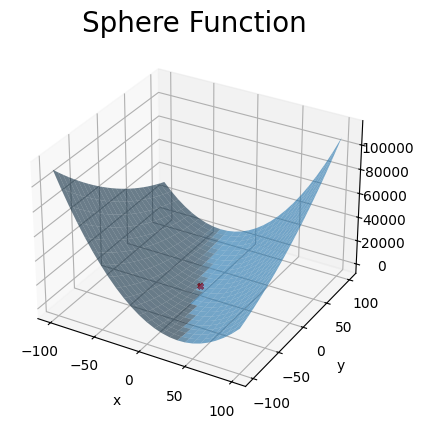

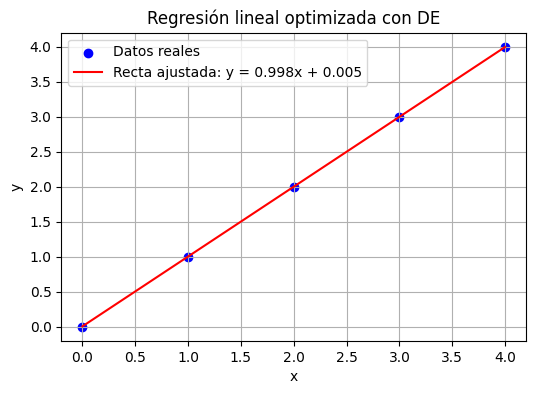

In [ ]:
#######################################################################################
#Differential Evolution (DE) Algorithm #
#Authors: # Jorge Galvez, UdG
#Modified: #Christian Luna, UdG 08/26/2025
#######################################################################################

# Import required libraries.
import numpy as np
import matplotlib.pyplot as plt
import time

# es solo para obtener los mismos resultados de mi "baraja"
np.random.seed(42)

# datos para practica 1, ML (regresion Lineal):

# X = lugares de la casa
# y = donde estan las llaves en cada lugar

x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([0, 1, 2, 3, 4], dtype=float)

# Fitness function definition. In this example, the Sphere function is used as
# the optimization problem to be solved. Sphere function exhibits an unimodal
# and convex surface.
def sphere(x):
    w, b = x[0, 0], x[0, 1]   #la recta candidata
    y_hat = w * X + b         # predice donde estarian las llaves
    fit = np.mean((y - y_hat) ** 2)    #mide que tan mal fallo
    return fit

    #codigo anterior del dr galvez.
    #n = x.size
    #score = 0
    #for i in range(n):
        #score = score + (x[0, i] * x[0, i])
    #fit = score
    #return fit

# The maximum number of iterations is established.
dimensions = 2

# The limits of the search space are defined.

#modified By Chritian Luna se cambio a -5 y 5 que es donde sabemos que estan los valores correctos,
#seria como buscar mis llaves perdidas en mi casa en lugar de toda la ciudad XD
t = np.array([-5, 5])
f_range = np.tile(t, (dimensions, 1))

# The maximum number of iterations is established.

#modified By christian Luna, aumente la cantidad de vueltas mientras mas intentos mas posibilidades
max_iter = 1000

# The population size is defined, as well as the variable

#modified By christian Luna, es como tener 30 personas buscando mis llaves al mismo tiempo
# to hold the population elements.
num_agents = 30
agents = np.zeros((num_agents, dimensions))

# Initialization process for the initial population. In this example code,
# agents is the variable which represents the population of num_agents.
for i in range(dimensions):
    dim_f_range = f_range[i, 1] - f_range[i, 0]
    agents[:, i] = np.random.rand(num_agents) * dim_f_range + f_range[i, 0]

best_position = np.zeros(dimensions)
best_fitness = np.nan
fitness = np.empty(num_agents)

# The best solution and the best fitness value for the initial population is obtained.
for i in range(num_agents):
    fitness[i] = sphere(np.array([agents[i]]))
    if i == 0:
        best_position = agents[i]
        best_fitness = fitness[i]
    elif fitness[i] < best_fitness:
        best_position = agents[i]
        best_fitness = fitness[i]

# The iteration counter is defined.
iter = 1

aux_selector = np.arange(num_agents)

# The scaling factor of the algorithm is established.
# modified by christian luna, se aumento a pasos medianos avanzar lo suficiente sin perder detalle
#buen equilibrio para encontrar las llaves :)
m = 0.7

# The cross factor of the algorithm is established.

# modified by christian luna 90% del tiempo probamos mas estrategias para buscar en otros lados
cross_p = 0.9

# Graph initialization parameters only for fitness functions
# defined by 2 decision variables.
if dimensions == 2:
    xGraph = np.linspace(-100, 100, 25)
    yGraph = np.linspace(-100, 100, 25)
    xv, yv = np.meshgrid(xGraph, yGraph)
    fitnessGraph = np.zeros((25, 25))
    for i in range(25):
        for j in range(25):
            arr = [[xv[i, j], yv[i, j]]]
            fitnessGraph[i, j] = sphere(np.asarray(arr))
    plt.ion()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.title('Sphere Function', fontsize=20)
    ax.plot_surface(xv, yv, fitnessGraph, alpha=0.6)
    ax.scatter(agents[:, 0], agents[:, 1], fitness[:], c='red', s=10, marker="x")
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.000000001)

# Main loop process for the optimization process.
# Here the entire functionality of the DE algorithm is implemented.
while iter < max_iter:
    for i in range(agents.shape[0]):
        # Three different individuals are chosen.
        indexes = aux_selector[aux_selector != i]
        indexes = np.random.choice(indexes, 3, replace=False)
        agents_selected = agents[indexes]
        # The differential mutation operation is performed to obtain the mutant vector.
        mut = agents_selected[0] + m * (agents_selected[1] - agents_selected[2])
        # The crossover operation of the DE algorithm is performed.
        prob_vector = np.random.rand(dimensions) <= cross_p
        mut = agents[i] * np.logical_not(prob_vector) + mut * prob_vector #modified by christian luna
        # mut = agents[i] * prob_vector + mut * np.logical_not(prob_vector), #version del dr, galvez
        #invertimos usando las condiciones al reves si cruza, tomas el valor del mutante (nueva idea donde buscar las llaves)
        # si no cruza, continuamos con el plan original.

        # It is verified that the generated vector is
        # within the search space defined by the upper and lower limits.
        for j in range(dimensions):
            upper_limit = f_range[j, 1]
            lower_limit = f_range[j, 0]

            if mut[j] < lower_limit:
                mut[j] = lower_limit
            elif mut[j] > upper_limit:
                mut[j] = upper_limit

        # The fitness value of the mutant vector is obtained.
        fitness_mut = sphere(np.array([mut]))

        # The replacement mechanism is then performed.
        if fitness_mut < fitness[i]:
            agents[i] = mut
            fitness[i] = fitness_mut
            if fitness[i] < best_fitness:
                best_position = agents[i]
                best_fitness = fitness[i]

        # In this example, the Sphere function is plotted to
        # visually validate the movement of the search agents.
        if dimensions == 2:
            plt.cla()
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            plt.title('Sphere Function', fontsize=20)
            ax.plot_surface(xv, yv, fitnessGraph, alpha=0.6)
            ax.scatter(agents[:, 0], agents[:, 1], fitness[:], c='red', s=10, marker="x")
            fig.canvas.draw()
            fig.canvas.flush_events()
            time.sleep(0.000000001)

        iter = iter + 1
        print("Iteration: " + str(iter))

# The best solution (decision variables) as well
# as the best fitness value for the optimization process is showed.
print("Best solution: " + str(best_position[0]) + ", "  + str(best_position[1]))
print("Best fitness: " + str(best_fitness))


# --- Visualización 2D del ajuste --- By christian luna, solo mostrar el grafico con la linea recta
import matplotlib.pyplot as plt

w_opt, b_opt = best_position[0], best_position[1]
y_hat = w_opt * X + b_opt

plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label="Datos reales")
plt.plot(X, y_hat, color='red', label=f"Recta ajustada: y = {w_opt:.3f}x + {b_opt:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión lineal optimizada con DE")
plt.legend()
plt.grid(True)
plt.show()
